In [6]:
!pip install pandas

In [7]:
!pip install numpy

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [33]:
# 1. Load the dataset
import pandas as pd
data = pd.read_csv(r"C:\Users\bbuser\Downloads\student_admission_dataset.csv")
data


,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
...,...,...,...,...
245,3.57,1024,3,Rejected
246,2.86,1367,1,Waitlisted
247,3.09,1036,3,Waitlisted
248,3.51,1375,5,Waitlisted


In [43]:
from sklearn.preprocessing import StandardScaler


In [46]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



Encoded Labels: {'Accepted': np.int64(0), 'Rejected': np.int64(1), 'Waitlisted': np.int64(2)}

Accuracy: 0.440


C:\Users\bbuser\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


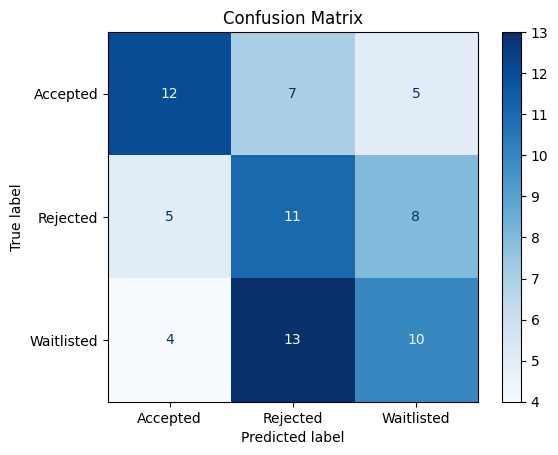

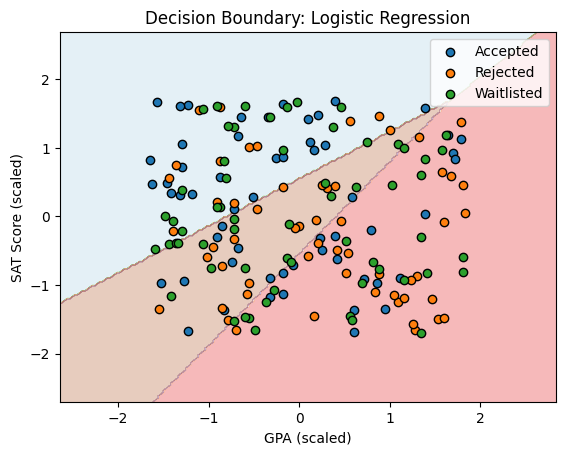

In [51]:
# 3. Encode target labels (Admission_Status)
le = LabelEncoder()
data["Admission_Status_encoded"] = le.fit_transform(data["Admission_Status"])
print("\nEncoded Labels:", dict(zip(le.classes_, le.transform(le.classes_))))

# 4. Select features and target
X = data[["GPA", "SAT_Score"]]   # using only 2 features so we can plot decision boundary
y = data["Admission_Status_encoded"]

# 5. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 6. Scale features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train logistic regression
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
model.fit(X_train_scaled, y_train)

# 8. Predictions
y_pred = model.predict(X_test_scaled)

# 9. Evaluate performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\nAccuracy: {acc:.3f}")
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 10. Plot decision boundary
x_min, x_max = X_train_scaled[:,0].min() - 1, X_train_scaled[:,0].max() + 1
y_min, y_max = X_train_scaled[:,1].min() - 1, X_train_scaled[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# scatter original points
for i, label in enumerate(le.classes_):
    plt.scatter(
        X_train_scaled[y_train==i, 0], 
        X_train_scaled[y_train==i, 1], 
        label=label, edgecolor="k"
    )

plt.xlabel("GPA (scaled)")
plt.ylabel("SAT Score (scaled)")
plt.title("Decision Boundary: Logistic Regression")
plt.legend()
plt.show()
